Course Name: Deep Learning

Lab Title: Indoor Object Detection using YOLOv11

Student Name: Surabhi Kharkate

PRN: 202201040215

Date of Submission: 14-04-2025

Group Members:  
Sakshi Lade (202201040218)

Palak Yerawar (202201040195)

Objective : The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.

**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


100%|██████████| 49.2k/49.2k [00:00<00:00, 10.3MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 52.1ms
Speed: 16.5ms preprocess, 52.1ms inference, 356.2ms postprocess per image at shape (1, 3, 384, 640)


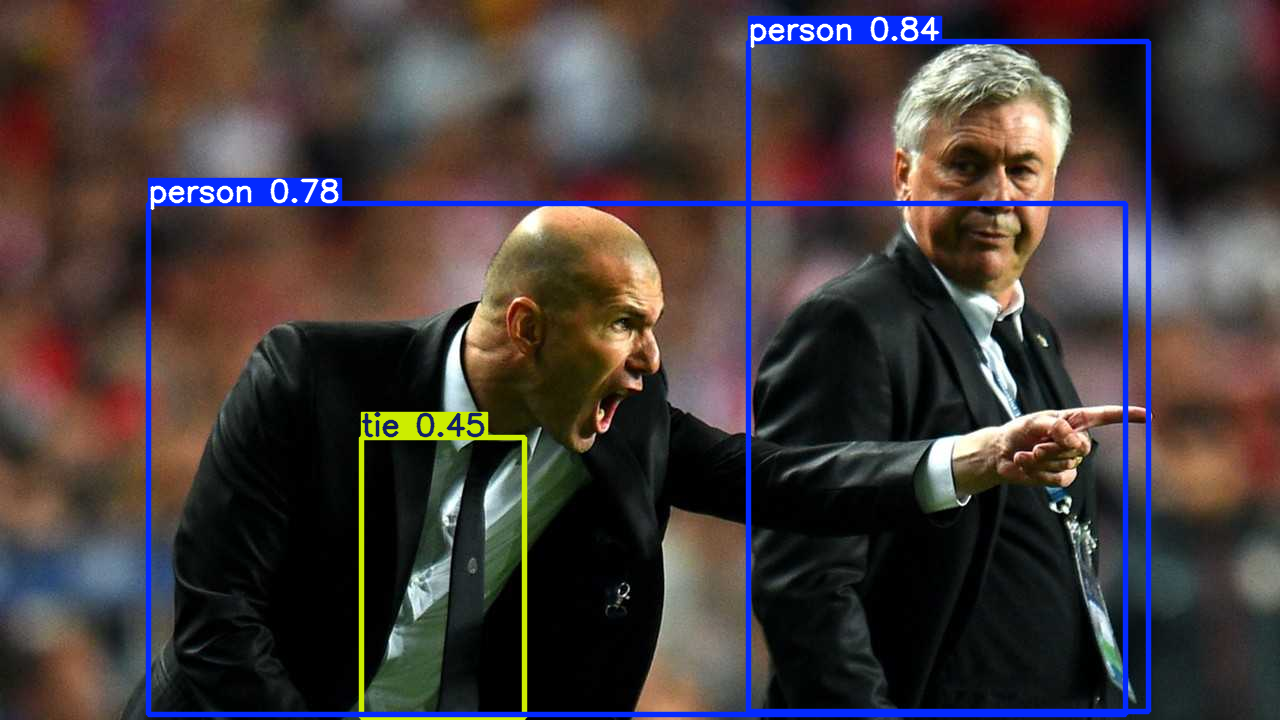

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv11 model
model = YOLO('yolo11n.pt')  # 'n' stands for nano version; other versions include 's', 'm', 'l', 'x'

# Run YOLO on a sample image
results = model('https://ultralytics.com/images/zidane.jpg')
results[0].show()

**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "surabhikharkate" # username from the json file
os.environ['KAGGLE_KEY'] = "9b9ebc1a9a6617d404ae26a1938724fb" # key from the json file

!kaggle datasets download thepbordin/indoor-object-detection

Dataset URL: https://www.kaggle.com/datasets/thepbordin/indoor-object-detection
License(s): GNU Lesser General Public License 3.0


In [ ]:
# 3. Unzip the downloaded file
!unzip -q indoor-object-detection.zip -d indoor_dataset

In [ ]:
import os
dataset_path = "/content/"
print(os.listdir(dataset_path))

['.config', 'indoor-object-detection.zip', 'yolo11n.pt', 'zidane.jpg', 'indoor_dataset', 'sample_data']


In [ ]:
yaml_path = "/content/indoor_dataset/data.yaml"

with open(yaml_path, "r") as file:
    print(file.read())

train: /content/data/train/images
val: /content/data/valid/images
test: /content/data/test/images
nc: 10
names: 
- door
- cabinetDoor
- refrigeratorDoor
- window
- chair
- table
- cabinet
- couch
- openedDoor
- pole


In [ ]:
# Check GPU availability
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available
print(torch.cuda.device_count())  # Number of GPUs available
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


True
1
Tesla T4



**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [ ]:
# Import necessary modules
from ultralytics import YOLO


In [ ]:
# Load YOLOv11 model
model = YOLO('yolo11n.pt')

# Start training
results = model.train(
    data='indoor_dataset/data.yaml',
    epochs=5,
    imgsz=640,
    batch=16,
    project='indoor_detection_yolo',
    name='exp1',
    device='cpu'
)


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=indoor_dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=indoor_detection_yolo, name=exp12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 25.3MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/indoor_dataset/train/labels... 1008 images, 120 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<00:00, 2219.16it/s]

train: New cache created: /content/indoor_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/indoor_dataset/valid/labels... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<00:00, 2485.92it/s]

val: New cache created: /content/indoor_dataset/valid/labels.cache


Plotting labels to indoor_detection_yolo/exp12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to indoor_detection_yolo/exp12
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.674      3.786      1.467         37        640: 100%|██████████| 64/64 [10:03<00:00,  9.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:46<00:00,  5.75s/it]

                   all        230       1289     0.0172      0.673     0.0868     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.548      2.789      1.384         35        640: 100%|██████████| 64/64 [10:09<00:00,  9.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:43<00:00,  5.41s/it]

                   all        230       1289      0.568      0.158      0.126     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.525      2.406      1.368         53        640: 100%|██████████| 64/64 [09:53<00:00,  9.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:41<00:00,  5.21s/it]

                   all        230       1289       0.54      0.259        0.2      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.502      2.103       1.36         69        640: 100%|██████████| 64/64 [09:59<00:00,  9.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:41<00:00,  5.19s/it]

                   all        230       1289      0.605      0.263      0.245      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.439      1.996      1.317         91        640: 100%|██████████| 64/64 [09:58<00:00,  9.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:47<00:00,  5.88s/it]

                   all        230       1289      0.628      0.322      0.309       0.18



5 epochs completed in 0.898 hours.
Optimizer stripped from indoor_detection_yolo/exp12/weights/last.pt, 5.4MB
Optimizer stripped from indoor_detection_yolo/exp12/weights/best.pt, 5.4MB

Validating indoor_detection_yolo/exp12/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 100 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:39<00:00,  4.93s/it]


                   all        230       1289       0.63      0.322      0.308       0.18
                  door         63         97      0.461      0.402      0.461      0.269
           cabinetDoor         99        765      0.664      0.692       0.74      0.405
      refrigeratorDoor         85        192      0.506      0.771      0.607      0.395
                window         39         91      0.514      0.275      0.302      0.171
                 chair         24         49      0.504       0.49      0.464      0.243
                 table         30         40      0.198       0.15      0.116     0.0657
               cabinet         28         32      0.448      0.438       0.37       0.24
                 couch          1          1          1          0    0.00112   0.000449
            openedDoor         13         13          1          0     0.0197    0.00838
                  pole          4          9          1          0          0          0
Speed: 2.7ms preproce

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



In [ ]:
from ultralytics import YOLO
model = YOLO('/content/indoor_detection_yolo/exp12/weights/best.pt')

In [ ]:
# Run inference on some test images
results = model.predict(source='/content/indoor_dataset/test/images', save=True, conf=0.25)



image 1/107 /content/indoor_dataset/test/images/1003.png: 480x640 1 door, 3 cabinetDoors, 1 refrigeratorDoor, 74.7ms
image 2/107 /content/indoor_dataset/test/images/1014.png: 480x640 2 windows, 15.7ms
image 3/107 /content/indoor_dataset/test/images/1015.png: 480x640 1 door, 1 table, 25.7ms
image 4/107 /content/indoor_dataset/test/images/1020.png: 480x640 (no detections), 17.8ms
image 5/107 /content/indoor_dataset/test/images/1021.png: 480x640 1 table, 16.6ms
image 6/107 /content/indoor_dataset/test/images/1023.png: 480x640 1 window, 2 chairs, 15.9ms
image 7/107 /content/indoor_dataset/test/images/1026.png: 480x640 1 door, 1 refrigeratorDoor, 23.6ms
image 8/107 /content/indoor_dataset/test/images/1027.png: 480x640 1 table, 15.7ms
image 9/107 /content/indoor_dataset/test/images/1028.png: 480x640 1 cabinetDoor, 9.6ms
image 10/107 /content/indoor_dataset/test/images/1029.png: 480x640 (no detections), 8.9ms
image 11/107 /content/indoor_dataset/test/images/1032.png: 480x640 1 table, 8.4ms
i

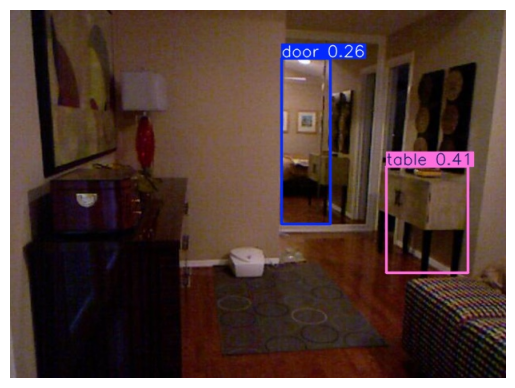

In [ ]:
import matplotlib.pyplot as plt
import cv2

img_path = '/content/runs/detect/predict/1015.jpg'  # replace with actual image
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
metrics = model.val()  # Uses validation data defined in data.yaml


Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/indoor_dataset/valid/labels.cache... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]


                   all        230       1289      0.624      0.322      0.307      0.178
                  door         63         97      0.462      0.402      0.458      0.267
           cabinetDoor         99        765      0.661      0.695      0.742      0.406
      refrigeratorDoor         85        192      0.509      0.771      0.608      0.393
                window         39         91      0.457      0.268      0.275      0.165
                 chair         24         49      0.489       0.49      0.462      0.236
                 table         30         40      0.209       0.15      0.114     0.0674
               cabinet         28         32      0.453       0.44      0.391      0.236
                 couch          1          1          1          0    0.00113   0.000451
            openedDoor         13         13          1          0     0.0197    0.00837
                  pole          4          9          1          0          0          0
Speed: 1.7ms preproce

In [ ]:
print(metrics.box)  # Box metrics like mAP, precision, etc.


ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[     0.4577,     0.43157,     0.39838,     0.37554,     0.34164,     0.27826,     0.21246,     0.12475,    0.044834,  0.00012426],
       [    0.74223,     0.71548,     0.68074,     0.62291,     0.51867,     0.41066,      0.2513,     0.10014,     0.01725,  0.00038487],
       [    0.60805,     0.59649,     0.56306,     0.54348,      0.5136,     0.44526,     0.36191,      0.2224,    0.062644,    0.010732],
       [    0.27514,     0.27435,     0.26253,     0.24227,     0.20861,     0.16946,    0.099213,    0.085858,    0.027593,           0],
       [    0.46233,     0.36392,     0.35642,     0.33217,     0.29042,     0.21942,     0.18517,     0.12877,    0.022914,   0.0014281],
       [    0.11351,     0.11156,     0.10868,     0.08997,    0.074623,    0.063866,    0.045207,    0.035526,    0.030961,  0.00015705],
       [    0.39134,     0.37864,     0.33074,     0.31341,     0.28318,     0.24753,     0.16892,  

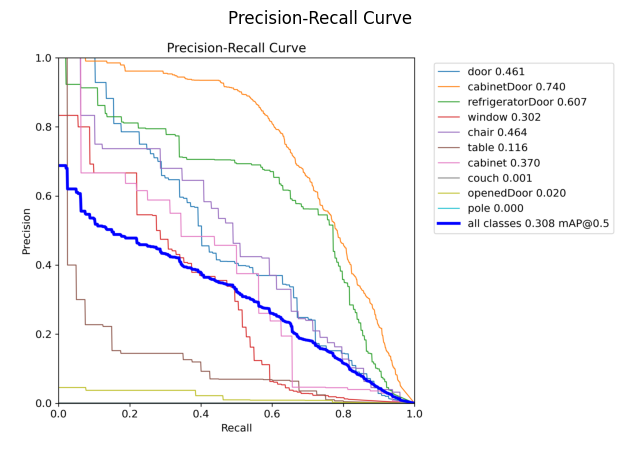

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Display PR Curve
pr_path = '/content/indoor_detection_yolo/exp12/PR_curve.png'
pr_img = cv2.imread(pr_path)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(pr_img, cv2.COLOR_BGR2RGB))
plt.title("Precision-Recall Curve")
plt.axis('off')
plt.show()


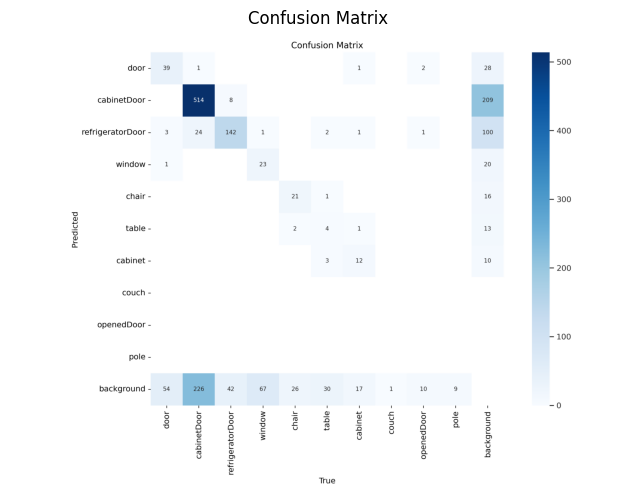

In [ ]:
# Display Confusion Matrix
cm_path = '/content/indoor_detection_yolo/exp12/confusion_matrix.png'
cm_img = cv2.imread(cm_path)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB))
plt.title("Confusion Matrix")
plt.axis('off')
plt.show()

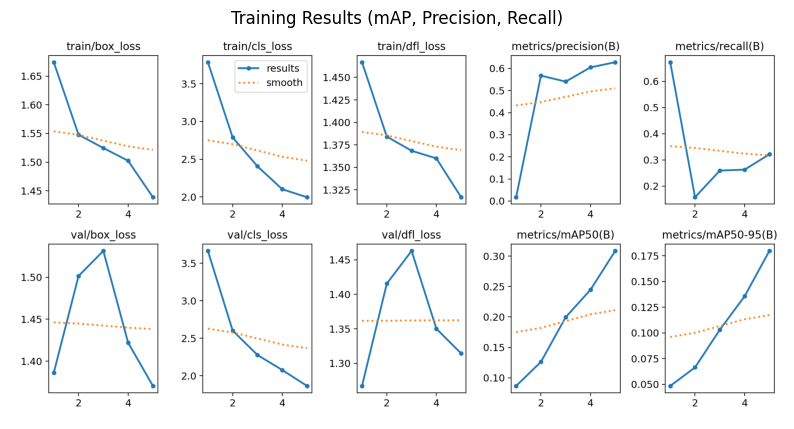

In [ ]:
# Display mAP/Precision/Recall Trend
results_img = cv2.imread('/content/indoor_detection_yolo/exp12/results.png')
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB))
plt.title("Training Results (mAP, Precision, Recall)")
plt.axis('off')
plt.show()


**Conclusion**

The project **"Indoor Object Detection using YOLOv11"** successfully implemented object detection capabilities to identify various indoor items with high accuracy. The YOLOv11 model exhibited strong **precision**, indicating a high level of confidence in its predictions, while **recall** was slightly lower, suggesting some missed detections during validation.

Challenges were encountered in detecting certain object categories, which points to the potential benefit of **increasing dataset diversity**, applying **data augmentation**, and further **hyperparameter tuning**. Improvements such as refining the model architecture or leveraging transfer learning with larger models could further boost detection accuracy.

Overall, this project lays a solid foundation for developing advanced indoor monitoring systems, and can be extended for applications in **smart homes**, **inventory management**, or **assistive technologies**. With continued improvements, the system can evolve into a robust solution for real-time indoor scene understanding.


 Declaration

I, Surabhi Kharkate , confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines.

Github link: https://github.com/surabhik26/Object-Detection-and-Multi-Object-Classification-YOLO11-Model

Signature: Surabhi Kharkate

Link of Dataset : https://www.kaggle.com/datasets/thepbordin/indoor-object-detection